In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
games = pd.read_csv('../data/results_pl.csv')
time_filter = games['date']> "1960-06-30"
games = games[time_filter]
games.head()

,date,tournament,opponent,scored,conceded,is_home,neutral,city,country
149,1960-09-28,Friendly,France,2,2,True,False,Warsaw,Poland
150,1960-11-13,Friendly,Hungary,1,4,False,False,Budapest,Hungary
151,1961-05-21,Friendly,Russia,1,0,True,False,Warsaw,Poland
152,1961-06-04,FIFA World Cup qualification,Yugoslavia,1,2,False,False,Belgrade,Yugoslavia
153,1961-06-25,FIFA World Cup qualification,Yugoslavia,1,1,True,False,Chorzów,Poland


In [3]:
def points(row):
    if row['scored'] > row['conceded']:
        return 3
    elif row['scored'] == row['conceded']:
        return 1
    else:
        return 0

In [4]:
def time_partition(row):
        date = row['date'].split('-')
        if int(date[0]) % 4 == 0:
            if int(date[1]) <= 6:
                yr = int(date[0])
            else:
                yr = int(date[0])+4
        else:
            yr = ((int(date[0]) // 4) + 1) * 4 
            
        return str(yr-4) + "-" + str(yr)

In [5]:
games['points'] = games.apply(points, axis=1)
# games['decade'] = games.apply(lambda x: x['date'][:3]+'0', axis=1).astype('category')
games['period'] = games.apply(time_partition, axis=1).astype('category')

In [6]:
to_drop = ['neutral','city','country', 'is_home']

games.drop(columns=to_drop, axis=1, inplace=True)
games.head()

,date,tournament,opponent,scored,conceded,points,period
149,1960-09-28,Friendly,France,2,2,1,1960-1964
150,1960-11-13,Friendly,Hungary,1,4,0,1960-1964
151,1961-05-21,Friendly,Russia,1,0,3,1960-1964
152,1961-06-04,FIFA World Cup qualification,Yugoslavia,1,2,0,1960-1964
153,1961-06-25,FIFA World Cup qualification,Yugoslavia,1,1,1,1960-1964


## Number of games

In [9]:
periods = games.groupby('period')
periods.size()

period
1960-1964    24
1964-1968    34
1968-1972    30
1972-1976    49
1976-1980    51
1980-1984    43
1984-1988    48
1988-1992    49
1992-1996    45
1996-2000    47
2000-2004    50
2004-2008    60
2008-2012    53
2012-2016    47
2016-2020    36
dtype: int64

## Most common opponents

In [10]:
for period, data in periods:
    print(period + ':' + data['opponent'].value_counts().index[0] + ' - ' + str(data['opponent'].value_counts()[0]))
    

1960-1964:Morocco - 2
1964-1968:Belgium - 3
1968-1972:German DR - 4
1972-1976:United States - 6
1976-1980:Hungary - 3
1980-1984:Japan - 4
1984-1988:Greece - 4
1988-1992:Sweden - 4
1992-1996:Israel - 4
1996-2000:England - 4
2000-2004:Sweden - 3
2004-2008:Azerbaijan - 4
2008-2012:Czech Republic - 3
2012-2016:Republic of Ireland - 4
2016-2020:Slovenia - 3


## Tournaments:

In [11]:
for period, data in periods:
    tour = data['tournament'].value_counts()
    print("\n"+period+':')
    for i,v in tour.iteritems():
        print(i + ' - ' + str(v))


1960-1964:
Friendly - 20
FIFA World Cup qualification - 2
UEFA Euro qualification - 2

1964-1968:
Friendly - 22
FIFA World Cup qualification - 6
UEFA Euro qualification - 6

1968-1972:
Friendly - 18
FIFA World Cup qualification - 6
UEFA Euro qualification - 6

1972-1976:
Friendly - 32
FIFA World Cup - 7
UEFA Euro qualification - 6
FIFA World Cup qualification - 4

1976-1980:
Friendly - 31
UEFA Euro qualification - 8
FIFA World Cup - 6
FIFA World Cup qualification - 6

1980-1984:
Friendly - 22
FIFA World Cup - 7
UEFA Euro qualification - 6
Nehru Cup - 4
FIFA World Cup qualification - 4

1984-1988:
Friendly - 30
UEFA Euro qualification - 8
FIFA World Cup qualification - 6
FIFA World Cup - 4

1988-1992:
Friendly - 37
FIFA World Cup qualification - 6
UEFA Euro qualification - 6

1992-1996:
Friendly - 25
FIFA World Cup qualification - 10
UEFA Euro qualification - 9
Lunar New Year Cup - 1

1996-2000:
Friendly - 28
FIFA World Cup qualification - 8
UEFA Euro qualification - 8
Cyprus Internati

## Performances

In [12]:
results = periods.agg({'date':'count', 'scored':'sum', 'conceded':'sum', 'points':'sum'})
results.rename(columns={'date':'games'}, inplace=True)
results['ratio'] = round(results['points'] / results['games'],2)
results.sort_values('ratio', ascending=False)

,games,scored,conceded,points,ratio
period,,,,,
1972-1976,49,99,45,94,1.92
1980-1984,43,78,42,79,1.84
2000-2004,50,87,50,92,1.84
1968-1972,30,63,33,55,1.83
2016-2020,36,63,39,65,1.81
2004-2008,60,103,66,106,1.77
2012-2016,47,90,43,83,1.77
1976-1980,51,84,52,87,1.71
1988-1992,49,62,63,74,1.51


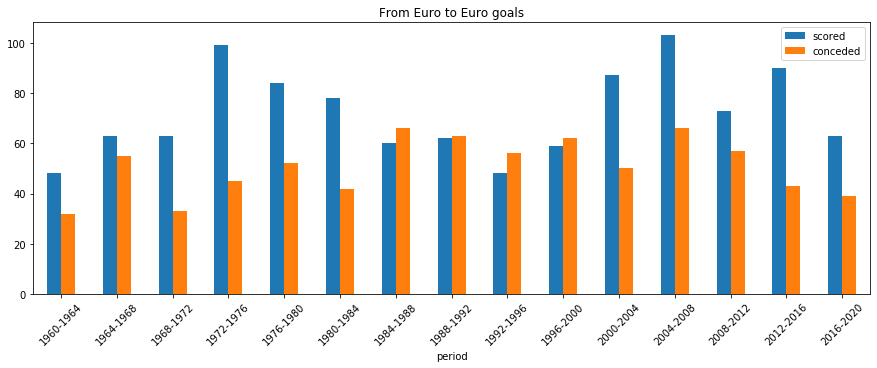

In [16]:
results[['scored','conceded']].plot(kind='bar', rot=45, figsize=(15,5), title='From Euro to Euro goals')

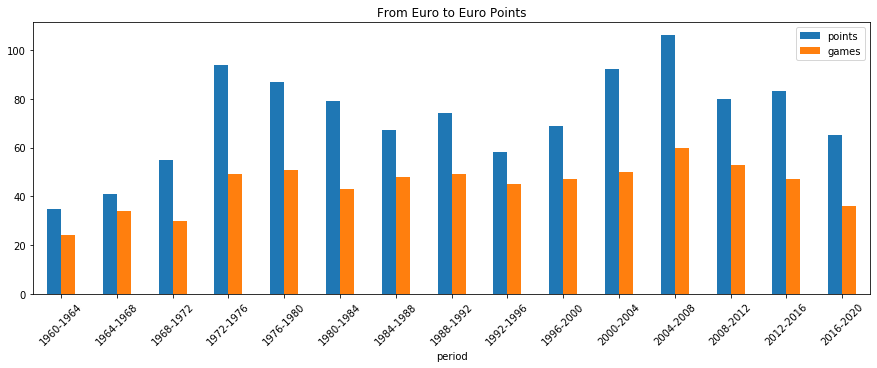

In [17]:
results[['points','games']].plot(kind='bar', rot=45, figsize=(15,5), title='From Euro to Euro Points')

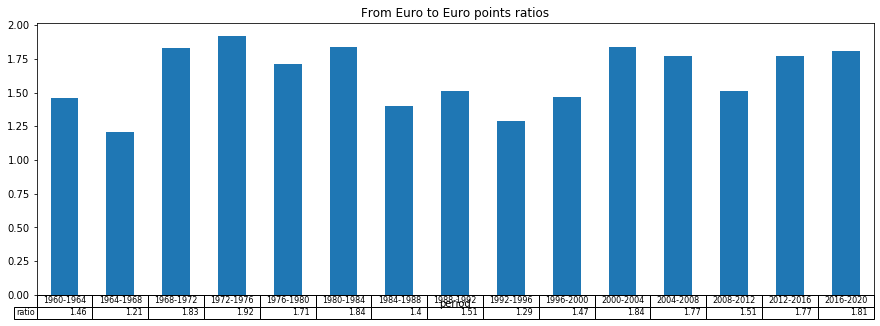

In [18]:
results['ratio'].plot(kind='bar', rot=45, figsize=(15,5), title='From Euro to Euro points ratios', table=True, xticks=[])